In [80]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline
import pandas as pd
from scipy.stats import multivariate_normal
from scipy.stats import mode

**Questions 1a, 1b)**

In [3]:
Xtrain_labels, Xtrain_data, images = [], [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    images.append(im)
    flattened_train = im.flatten()
    Xtrain_data.append(flattened_train)
    Xtrain_labels.append(line.strip().split()[1])

Xtrain_data, Xtrain_labels = np.array(Xtrain_data, dtype=float), np.array(Xtrain_labels, dtype=int)
    
print(Xtrain_data.shape, Xtrain_labels.shape)

C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(540, 2500) (540,)


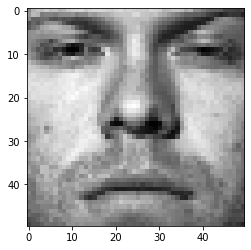

In [4]:
plt.imshow(Xtrain_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [5]:
Xtest_labels, Xtest_data, images2 = [], [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    images2.append(im)
    flattened_test = im.flatten()
    Xtest_data.append(flattened_test)
    Xtest_labels.append(line.strip().split()[1])
    
Xtest_data, Xtest_labels = np.array(Xtest_data, dtype=float), np.array(Xtest_labels, dtype=int)
    
print(Xtest_data.shape, Xtest_labels.shape)

(100, 2500) (100,)


C:\Users\bls24\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


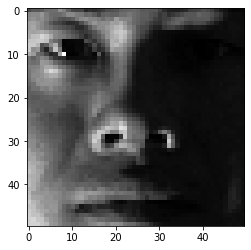

In [6]:
plt.imshow(Xtest_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

**Question 1c)**

In [7]:
sums = np.sum(Xtrain_data, axis=0)
average_face  = sums / 540

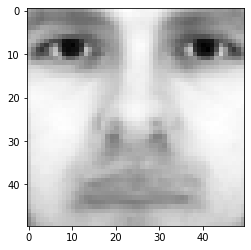

In [8]:
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

**Question 1d)**

In [9]:
mean_subtraction_train = Xtrain_data - average_face

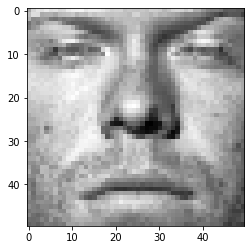

In [10]:
plt.imshow(mean_subtraction_train[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

In [11]:
mean_subtraction_test = Xtest_data - average_face

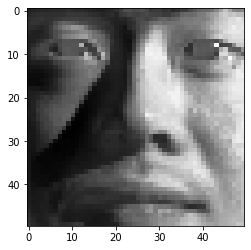

In [12]:
plt.imshow(mean_subtraction_test[11, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

**Question 1e)**

In [18]:
def pca(X, p):
    Sigma = X.T.dot(X) / X.shape[0] # form covariance matrix
    L, Q = np.linalg.eig(Sigma) # perform eigendecomposition            
    V = np.real(Q[:,:p]) # get top p eigenvectors
    return V

In [19]:
eigenfaces = pca(mean_subtraction_train,10).T

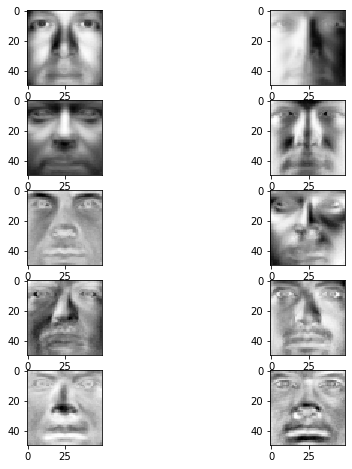

In [97]:
w = 20
h = 20
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 5
for i in range(1, len(eigenfaces)+1):
    fig.add_subplot(rows,columns,i)
    plt.imshow(eigenfaces[i-1].reshape(50,50), cmap = cm.Greys_r)
plt.show()

**Question 1f**

In [46]:
def feature_matrix(X, p):
    Sigma = X.T.dot(X) / X.shape[0]
    V, L, Vt = np.linalg.svd(X)
    W = Vt[:p, :]
    return X.dot(W.T)

**Question 1g**

In [47]:
def feature_matrix2(X, p):
    Sigma = X.T.dot(X) / X.shape[0]
    V, L, Vt = np.linalg.svd(X)
    W = Vt[:p, :]
    return W.T

In [48]:
F = mean_subtraction_train.dot(feature_matrix2(mean_subtraction_train, 10))

In [49]:
Ftest = mean_subtraction_test.dot(feature_matrix2(mean_subtraction_train, 10))

In [50]:
F.shape

(540, 10)

In [51]:
Ftest.shape

(100, 10)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import linear_model, feature_extraction, metrics

In [53]:
logreg1 = LogisticRegression(C=1e5, multi_class="ovr")
logreg1.fit(F, Xtrain_labels)

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
print('Accuracy on ten PCA dimensions: %.2f' % logreg1.score(F, Xtrain_labels))
print('Accuracy on ten PCA dimensions: %.2f' % logreg1.score(Ftest, Xtest_labels))

Accuracy on ten PCA dimensions: 0.77
Accuracy on ten PCA dimensions: 0.81


In [57]:
F200 = mean_subtraction_train.dot(feature_matrix2(mean_subtraction_train, 200))
Ftest200 = mean_subtraction_test.dot(feature_matrix2(mean_subtraction_train, 200))

In [58]:
F200.shape

(540, 200)

In [59]:
scores = []
x = []
for f in range(1,200):
    x.append(f)
    clf = LogisticRegression(multi_class = "ovr", solver="liblinear").fit(F200[:,:f], Xtrain_labels)
    predict = clf.predict(Ftest200[:,:f])
    scores.append(metrics.accuracy_score(Xtest_labels, predict))

C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bls24\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

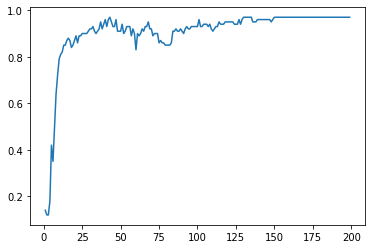

In [60]:
plt.plot(x, scores)

**Question 2**

In [62]:
import pandas
data = pandas.read_csv("OldFaithful.csv")[["eruptions", "waiting time"]]

**Question 2a**

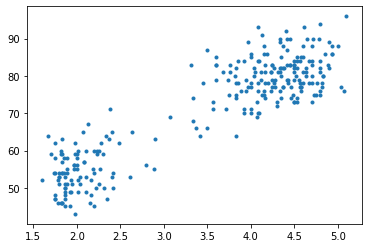

In [63]:
plt.plot(data["eruptions"], data["waiting time"], '.')

**Quesition 2d**

In [81]:
X = data.to_numpy().astype(float)

Number of iterations: 50


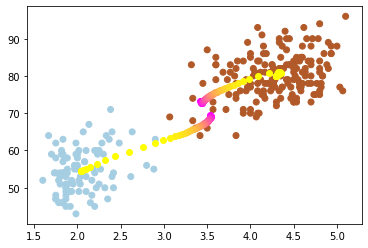

In [85]:
n, d = X.shape
K = 2

phis = np.full(shape=K, fill_value=1/K)
weights = np.full( shape=X.shape, fill_value=1/K)
randrow = np.random.randint(low=0, high=n, size=K)
mus = [  X[row_index,:] for row_index in randrow ]
Sigmas = [ np.cov(X.T) for _ in range(K) ]

mus_change = []

class EM_steps:
    def __init__(self, mus, Sigmas, phis, weights, n, K):
        self.mus = mus
        self.Sigmas = Sigmas
        self.phis = phis
        self.weights = weights
        self.n = n
        self.K = K
        
    def update_weights(self, X):
        likelihood = np.zeros( (self.n, self.K) )
        for i in range(self.K):
            likelihood[:,i] = multivariate_normal(mean=self.mus[i], cov=self.Sigmas[i]).pdf(X)
        num = likelihood * self.phis
        weights = (num)/(num.sum(axis=1)[:,np.newaxis])
        return weights
            
    def e_step(self, X):
        self.weights = self.update_weights(X)
        self.phis = weights.mean(axis=0)

    def m_step(self, X):
        for i in range(K):
            weights = self.weights[:, [i]]
            total_weight = weights.sum()
            self.mus[i] = (X * weights).sum(axis=0) / total_weight
            self.Sigmas[i] = np.cov(X.T, 
                aweights=(weights/total_weight).flatten(), 
                bias=True)
        mus_change.append(np.asarray(self.mus))


model = EM_steps(mus, Sigmas, phis, weights, n, K)
prevMus = np.asarray([X[row_index,:] for row_index in randrow ])
for iteration in range(300):
    model.e_step(X)
    model.m_step(X)
    if(np.amax(np.abs(prevMus - np.asarray(model.mus)))<.001):
        break
    prevMus = np.asarray(model.mus)
print("Number of iterations:",iteration)


weights = model.update_weights(X)
y_pred = np.argmax(weights, axis=1)


plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap = 'Paired')
mus_change = np.asarray(mus_change)
for i in range(mus_change.shape[0]):
    plt.scatter(mus_change[i,:,0],mus_change[i,:,1],color = plt.cm.spring(i*7))

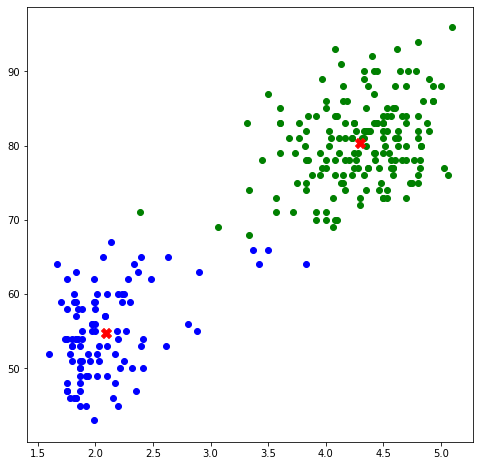

In [86]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X)
centroids = km.cluster_centers_
fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(X[km.labels_ == 0, 0], X[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X[km.labels_ == 1, 0], X[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=100,
            c='r', label='centroid')